In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import load_digits
from sklearn.base import BaseEstimator

In [18]:
digits = load_digits()

In [19]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [20]:
class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [21]:
digits = load_digits()

In [22]:
y = (digits.target ==7).astype(int)
X_train,X_test,y_train,y_test = train_test_split(digits.data,
                                                 y,
                                                 random_state = 11)

In [23]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [29]:
def get_clf_eval(y_test,pred):
    from sklearn.metrics import accuracy_score,\
                                confusion_matrix,\
                                precision_score,\
                                recall_score
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율:{recall:.4f}')
    
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace = True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace = True)
    return df

def drop_features(df):
    df.drop(columns = ['PassengerId', 'Name', 'Ticket'], inplace=True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder     # 필요한 import를 함수에 넣어주는 것도 좋다.
    df['Cabin'] = df['Cabin'].str[0]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

def transform_features(df):         # 만들어진 함수를 차례대로 실행하는 함수.
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(columns=['Survived'])
X_titanic_df = transform_features(X_titanic_df)
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,
                                                 y_titanic_df,
                                                 test_size = 0.2,
                                                 random_state = 11)

In [31]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705


In [34]:
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [35]:
lr_clf.predict_proba(X_test)

array([[0.44935225, 0.55064775],
       [0.86335511, 0.13664489],
       [0.86429643, 0.13570357],
       [0.84968519, 0.15031481],
       [0.8234341 , 0.1765659 ],
       [0.84231224, 0.15768776],
       [0.87095489, 0.12904511],
       [0.27228603, 0.72771397],
       [0.78185128, 0.21814872],
       [0.33185998, 0.66814002],
       [0.86178763, 0.13821237],
       [0.87058098, 0.12941902],
       [0.86425951, 0.13574049],
       [0.87065944, 0.12934056],
       [0.56033544, 0.43966456],
       [0.85003023, 0.14996977],
       [0.88954172, 0.11045828],
       [0.74250732, 0.25749268],
       [0.71120224, 0.28879776],
       [0.23776278, 0.76223722],
       [0.75684107, 0.24315893],
       [0.62428169, 0.37571831],
       [0.84655246, 0.15344754],
       [0.82711256, 0.17288744],
       [0.86825629, 0.13174371],
       [0.77003828, 0.22996172],
       [0.82946349, 0.17053651],
       [0.90336131, 0.09663869],
       [0.73372049, 0.26627951],
       [0.68847387, 0.31152613],
       [0.

In [36]:
from sklearn.preprocessing import Binarizer

In [39]:
X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

In [41]:
binarizer = Binarizer(threshold=1.1)
binarizer.fit_transform(X)
# array([[1., 0., 1.],     0.0일 때,
#        [1., 0., 0.],
#        [0., 1., 1.]])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [50]:
custom_threshold=0.4         # 임계치. (낮추면, 재현율을 올릴 수 있고, 높이면 정밀도를 높일 수 있다.)
pred_proba_1 = lr_clf.predict_proba(X_test)[:,1].reshape(-1,1)
#pred_proba_1
binarizer = Binarizer(threshold=custom_threshold)
custom_predict = binarizer.fit_transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)
# 오차행렬
# [[108  10]
#  [ 14  47]]
# 정확도:0.8659, 정밀도:0.8246, 재현율:0.7705

오차행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도:0.7042, 재현율:0.8197


In [52]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold)
        custom_predict = binarizer.fit_transform(pred_proba_1)
        print('임계값', custom_threshold)
        get_clf_eval(y_test,custom_predict)

In [53]:
get_eval_by_threshold(y_test, pred_proba_1, thresholds)

임계값 0.4
오차행렬
[[97 21]
 [11 50]]
정확도:0.8212, 정밀도:0.7042, 재현율:0.8197
임계값 0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도:0.8547, 정밀도:0.7869, 재현율:0.7869
임계값 0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도:0.8659, 정밀도:0.8246, 재현율:0.7705
임계값 0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도:0.8715, 정밀도:0.8654, 재현율:0.7377
임계값 0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도:0.8771, 정밀도:0.8980, 재현율:0.7213


In [55]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],2))

print('샘플 임계값별 정밀도:', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 Shape: (147,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도: [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율: [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


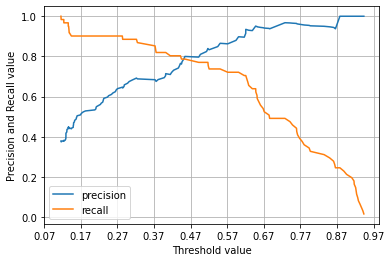

In [57]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_1):
    precisions, recalls,  thresholds = precision_recall_curve(y_test, pred_proba_1)
    
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])  # 0.45지점에서 재현율과 정밀도가 비슷해진다.